In [1]:
import pandas as pd
import numpy as np
import string
from wordcloud import STOPWORDS

import matplotlib.pyplot as plt
import seaborn as sns

ia_data = pd.read_csv('ia4000.csv')
rt_data = pd.read_csv('rt4000.csv')

ia_data['text'] = ia_data.text.astype(str)
rt_data['text'] = rt_data.text.astype(str)

# lets del duplicate posts and nan

ia_data = ia_data.drop_duplicates(subset=['text'])
rt_data = rt_data.drop_duplicates(subset=['text'])
ia_data = ia_data[ia_data.text != 'nan']
rt_data = rt_data[rt_data.text != 'nan']

ia_data.shape, rt_data.shape

((3984, 4), (3696, 4))

Lets compare this datasets delite data leaks and extract meta features</br>
I have learn here how to extract meta features: </br>
https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert

In [2]:
rt_data['word_count'] = rt_data.text.apply(lambda x: len(str(x).split()))
ia_data['word_count'] = ia_data.text.apply(lambda x: len(str(x).split()))

rt_data['unique_word_count'] = rt_data.text.apply(lambda x: len(set(str(x).split())))
ia_data['unique_word_count'] = ia_data.text.apply(lambda x: len(set(str(x).split())))

rt_data['url_count'] = rt_data['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
ia_data['url_count'] = ia_data['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

rt_data['stop_word_count'] = rt_data['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
ia_data['stop_word_count'] = ia_data['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# mean_word_length
rt_data['mean_word_length'] = rt_data['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
ia_data['mean_word_length'] = ia_data['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
rt_data['char_count'] = rt_data['text'].apply(lambda x: len(str(x)))
ia_data['char_count'] = ia_data['text'].apply(lambda x: len(str(x)))

# punctuation_count
rt_data['punctuation_count'] = rt_data['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
ia_data['punctuation_count'] = ia_data['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
rt_data['hashtag_count'] = rt_data['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
ia_data['hashtag_count'] = ia_data['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
rt_data['mention_count'] = rt_data['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
ia_data['mention_count'] = ia_data['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

ia_data.head()

,id,owner_id,text,likes,word_count,unique_word_count,url_count,stop_word_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,193283,-166774454,Редакция «Панорамы» не занимается нативными ин...,803,98,87,0,0,6.193878,706,21,0,0
1,354736,-166774454,Полиция проведёт проверку по факту попытки вос...,165,16,16,1,0,8.125000,146,7,0,0
2,354696,-166774454,Депутаты заставят офисных работников укреплять...,186,13,13,1,0,9.384615,136,7,0,0
3,354572,-166774454,"Банк “Тинькофф” переименуют в ""Российскую собо...",514,14,14,1,0,8.928571,139,11,0,0
4,354532,-166774454,Полицейские штата Айова арестовали пенсионерок...,380,15,15,1,0,9.200000,153,8,0,0


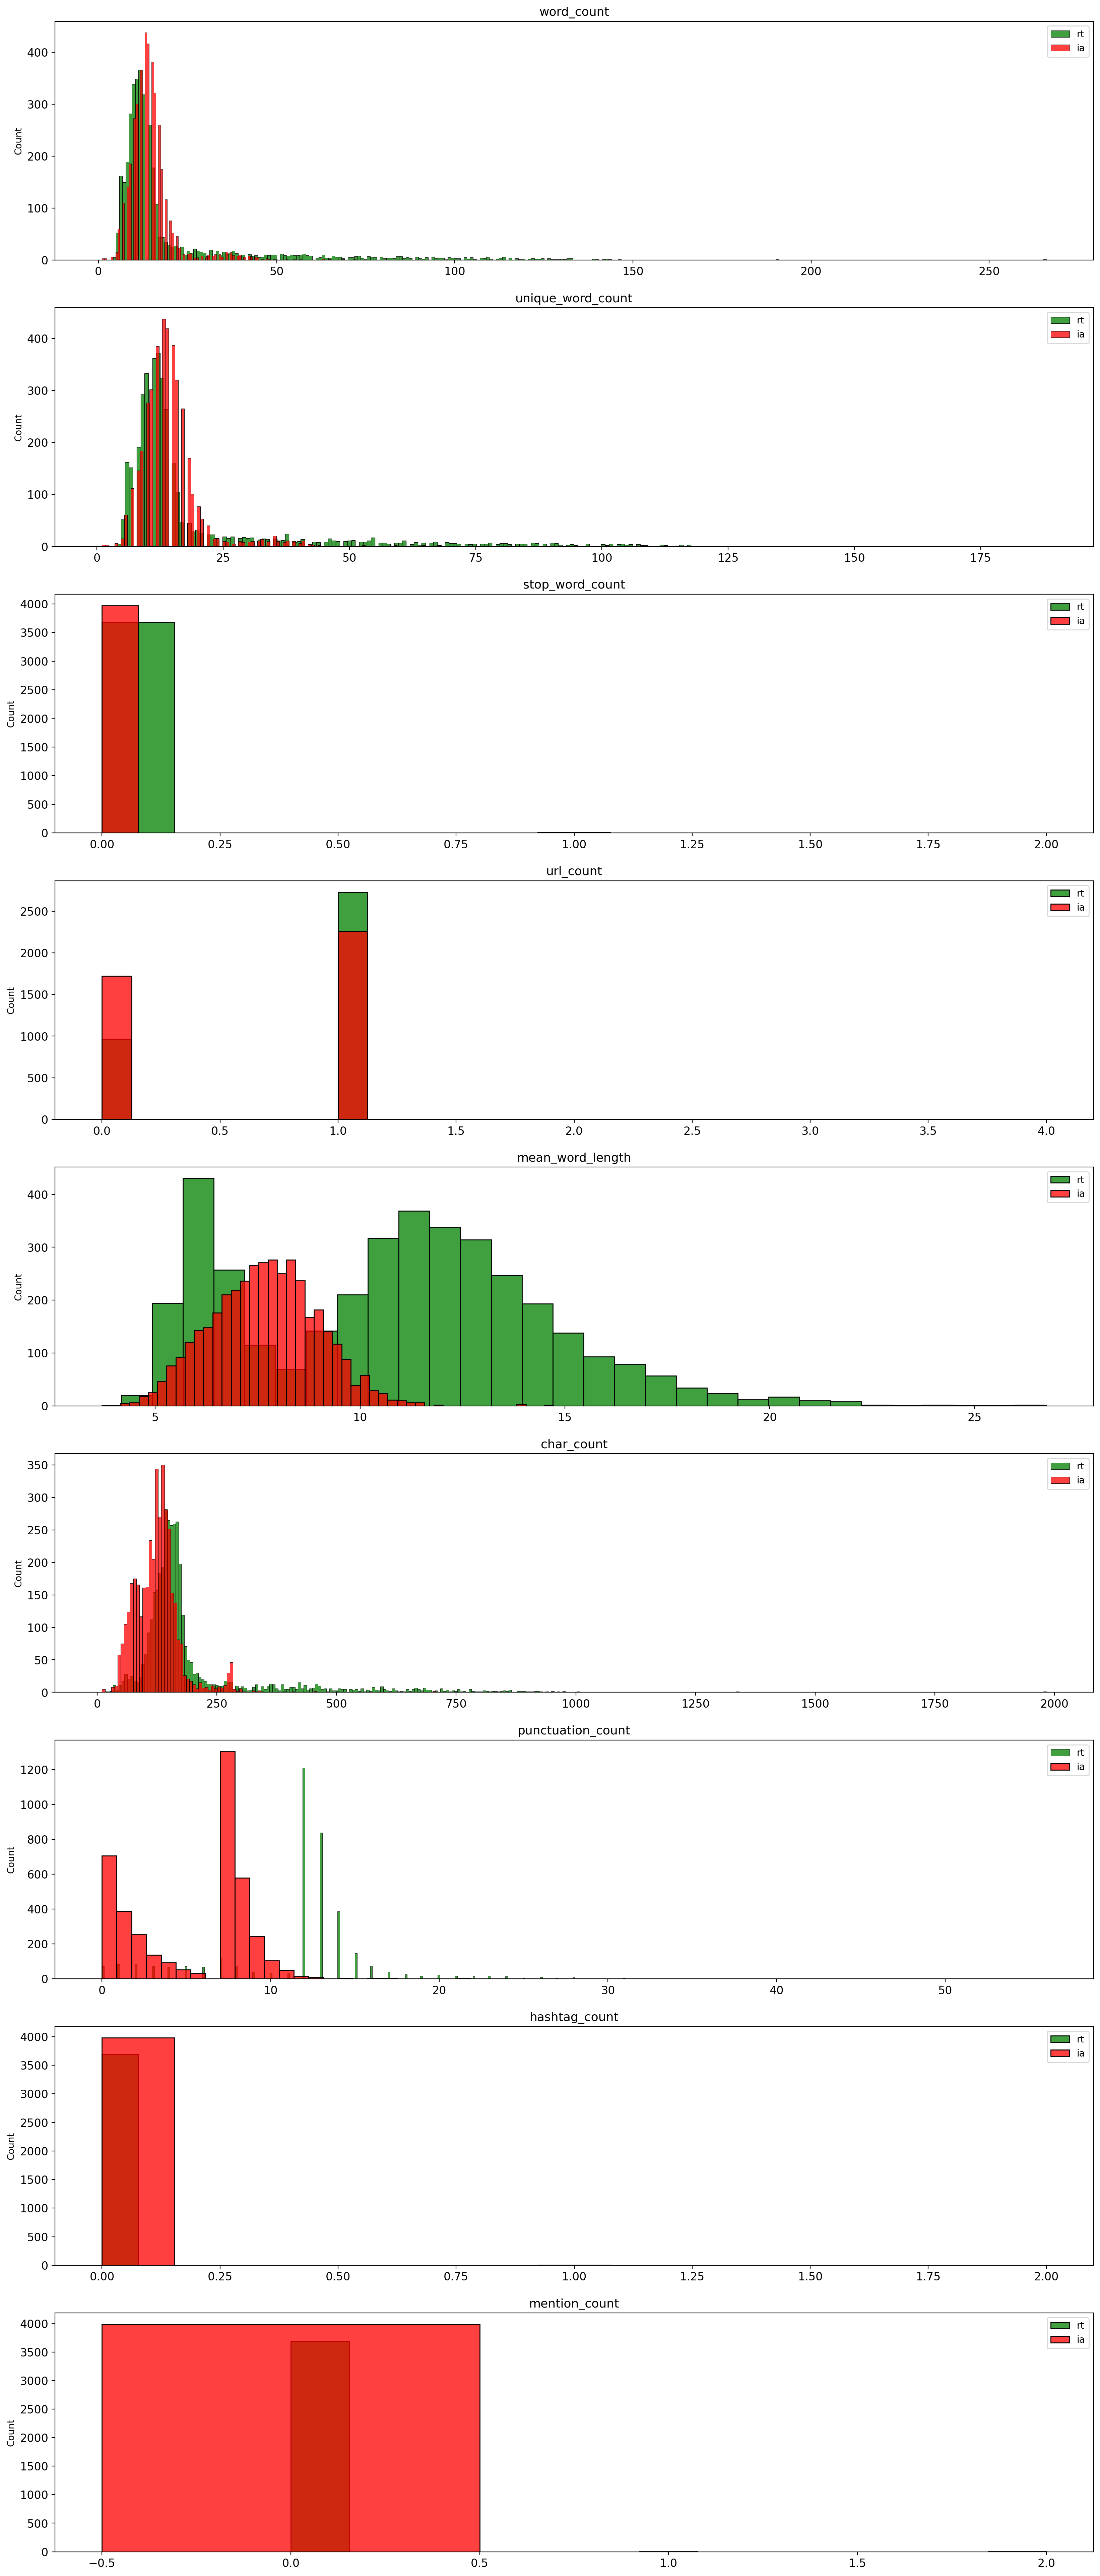

In [3]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']

fig, axes = plt.subplots(ncols=1, nrows=len(METAFEATURES), figsize=(20, 50), dpi=200)

for i, feature in enumerate(METAFEATURES):
    sns.histplot(rt_data.loc[:, feature], label='rt', ax=axes[i], color='green')
    sns.histplot(ia_data.loc[:, feature], label='ia', ax=axes[i], color='red')

    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].legend()
    
    axes[i].set_title(f'{feature}', fontsize=13)

plt.show()

We can use metafeatures: punctual counts, mean word lenght and char_count

In [4]:
for i in range(10):
    print(ia_data.text.iloc[i], end=f"\n{'-'*105}\n")

Редакция «Панорамы» не занимается нативными интеграциями и «джинсой», поэтому дальнейшее существование проекта зависит в том числе и от поддержки читателей.

Недавно мы подключили систему VK Donut – оформив подписку всего за 149 рублей в месяц, вы можете оказать нам ощутимую поддержку и получить за это некоторые плюшки. Например, для подписчиков тексты публикуются целиком – нет необходимости переходить на сайт, чтобы прочитать новость. В ближайшие дни появятся и новые бонусы.

Если вам нравится наше издание – поддержите его, пожалуйста!
Чтобы подписаться, зайдите на нашу страницу в ВК, блок VK Donut будет сразу после описания. Или просто кликните здесь: vk.com/ia_panorama?w=donut_payment-166774454
---------------------------------------------------------------------------------------------------------
Полиция проведёт проверку по факту попытки воскрешения хомячка в детском саду

Текст: Гедиминас Кагановичюс
Продолжение: https://panorama.wtf/4581
----------------------------------------

In [5]:
for i in range(10):
    print(rt_data.text.iloc[i], end=f"\n{'-'*105}\n")

«Они же с вами не веселились на вечеринках на Даунинг-стрит, а, значит, и вашего покровительства не дождутся» 
 
➡Подробнее: https://russian.rt.com/ussr/news/993407-zaharova-rossiya-britancy
---------------------------------------------------------------------------------------------------------
Украинских пленных, которым нужна медпомощь, лечат в ЛНР российские врачи. 
 
В военном госпитале оборудованы палаты постоянного содержания, отделение реанимации, рентген, перевязочные и хирургические кабинеты. 
 
«Наши новости говорят, что там пленных убили, там гражданских убили россияне. Мне трудно было про это слышать, у меня много было злости на Россию. А сейчас у меня это всё пропало, потому что я вижу, что всё наоборот». 
 
Видео Минобороны России.
---------------------------------------------------------------------------------------------------------
Страшная находка на территории больницы в Мариуполе 
 
➡Подробнее: https://russian.rt.com/ussr/news/993311-mariupol-bolnica-grazhdanskie-

We have to delete: </br>
Текст: ...</br>
Продолжение: https://panorama ...</br>
and</br>
➡Подробнее: https://russian.rt.com/sport/news/988538-taktarov-reshenie-boy-yan-sterling</br>


In [8]:
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def clean_text(text):
    remove_ref = lambda line: 'Текст:' not in line and 'Продолжение:' not in line and 'Подробнее:' not in line
    text = ' '.join([line for line in text.split('\n') if remove_ref(line)])
    text = text.replace(':', '')
    text = remove_emoji(text)
    text = ' '.join(text.split()[:64])
    return text.lower()


rt_data['text_cleaned'] = rt_data.text.apply(lambda x: clean_text(x))
ia_data['text_cleaned'] = ia_data.text.apply(lambda x: clean_text(x))

In [9]:
for i in range(10):
    print(rt_data.text_cleaned.iloc[i], end=f"\n{'-'*105}\n")

«они же с вами не веселились на вечеринках на даунинг-стрит, а, значит, и вашего покровительства не дождутся»
---------------------------------------------------------------------------------------------------------
украинских пленных, которым нужна медпомощь, лечат в лнр российские врачи. в военном госпитале оборудованы палаты постоянного содержания, отделение реанимации, рентген, перевязочные и хирургические кабинеты. «наши новости говорят, что там пленных убили, там гражданских убили россияне. мне трудно было про это слышать, у меня много было злости на россию. а сейчас у меня это всё пропало, потому что я вижу, что всё наоборот». видео минобороны
---------------------------------------------------------------------------------------------------------
страшная находка на территории больницы в мариуполе
---------------------------------------------------------------------------------------------------------
минобороны россии опубликовало новый список украинских потерь
---------------

In [10]:
for i in range(10):
    print(ia_data.text_cleaned.iloc[i], end=f"\n{'-'*105}\n")

редакция «панорамы» не занимается нативными интеграциями и «джинсой», поэтому дальнейшее существование проекта зависит в том числе и от поддержки читателей. недавно мы подключили систему vk donut – оформив подписку всего за 149 рублей в месяц, вы можете оказать нам ощутимую поддержку и получить за это некоторые плюшки. например, для подписчиков тексты публикуются целиком – нет необходимости переходить на сайт, чтобы прочитать новость. в ближайшие
---------------------------------------------------------------------------------------------------------
полиция проведёт проверку по факту попытки воскрешения хомячка в детском саду
---------------------------------------------------------------------------------------------------------
депутаты заставят офисных работников укреплять здоровье на сельхозугодиях
---------------------------------------------------------------------------------------------------------
банк “тинькофф” переименуют в "российскую соборность имени п.а. столыпина"
----

In [11]:
rt_data.to_csv('rt_prep.csv')
ia_data.to_csv('ia_prep.csv')